In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error as mse

In [2]:
j = pd.read_csv('JULY_B_2018.csv')
a = pd.read_csv('AUG_B_2018.csv')
s = pd.read_csv('SEP_B_2018.csv')
o = pd.read_csv('OCT_B_2018.csv')
n = pd.read_csv('NOV_B_2018.csv')
d = pd.read_csv('DEC_B_2018.csv')
jan = pd.read_csv('JAN_B_2019.csv')
fab = pd.read_csv('FAB_B_2019.csv')
m = pd.read_csv('MAR_B_2018.csv')
ma = pd.read_csv('APR_B_2018.csv')
my = pd.read_csv('MAY_B_2018.csv')
ju = pd.read_csv('JUNE_B_2018.csv')
mar2019 = pd.read_csv('MAR_B_2019.csv')

In [4]:
ff3 = m.T.iloc[21:55]
ff4 = ma.T.iloc[21:55] # july data
ff5 = my.T.iloc[21:55] # august data
ff6 = ju.T.iloc[21:55] # september data
ff7 = j.T.iloc[21:55] # October data
ff8 = a.T.iloc[21:55] # november data
ff9 = s.T.iloc[21:55] # december data
ff10 = o.T.iloc[21:55] # january data
ff11 = n.T.iloc[21:55] # february data
ff12 = d.T.iloc[21:55]    # march data
ff1 = jan.T.iloc[21:55] # january data
ff2 = fab.T.iloc[21:55] #february
ffx = mar2019

In [5]:
ff3 = ff3.T

In [6]:
data = []
for d in ff3.values:
    for dx in d:
        data.append(dx)

In [7]:
d1 = data[1:]
d2 = data[0:len(data)-1]

In [8]:
# breaking the data into train and test
X_train = data[:600]
X_test = data[600:]

RMSE of the model : 3.2273070821676755


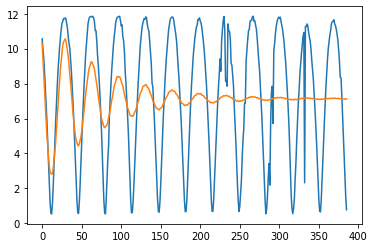

In [40]:
plt.plot(X_test)
plt.plot(yhat)

In [41]:
X_train = data[:600]
X_test = data[600:]
opt_a = 0
opt_b = 0
error = 99999
opt_y = []
for i in [1,2,3,4,5,6,7,8]:
    for j in [1,2,3,4,5,6,7,8]:
        try:
            model = ARMA(X_train, order=(i, j))
            model_fit = model.fit(disp=False)
            yhat = model_fit.predict(len(X_train), len(data)-1)
            print("RMSE of the model :",math.sqrt(mse(X_test,yhat)))
            if error>math.sqrt(mse(X_test,yhat)):
                opt_a = i
                opt_b = j
                error = math.sqrt(mse(X_test,yhat))
                opt_y = yhat
        except:
            continue
print("Optimal Order of the model :",opt_a,opt_b)
print("Optimal Error of the model :",error)

RMSE of the model : 3.792251168226747
RMSE of the model : 3.7799245966443955
RMSE of the model : 3.7792181957237974
RMSE of the model : 3.761521476622644
RMSE of the model : 3.75980445348648
RMSE of the model : 3.757793868909137
RMSE of the model : 3.7582109866644546
RMSE of the model : 3.7515565767977113
RMSE of the model : 3.416710228236443
RMSE of the model : 3.2132165571839586
RMSE of the model : 3.199751802039894
RMSE of the model : 3.2084706932761375
RMSE of the model : 3.2756033525153367
RMSE of the model : 3.356943618107794
RMSE of the model : 3.234970011903873
RMSE of the model : 3.166429630588898
RMSE of the model : 3.2197044626613627
RMSE of the model : 3.301131214625975
RMSE of the model : 3.193475300742521
RMSE of the model : 3.1966942683255812
RMSE of the model : 1.1980940065597665
RMSE of the model : 3.5462940581473887
RMSE of the model : 3.4463006746354883
RMSE of the model : 3.24568374629516
RMSE of the model : 3.2279621990381493
RMSE of the model : 3.2722771563885296


In [78]:
model = ARMA(X_train, order=(4, 8))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(X_train), len(data)-1)
print("RMSE of the model :",math.sqrt(mse(X_test,yhat)))

RMSE of the model : 1.1980940065597665


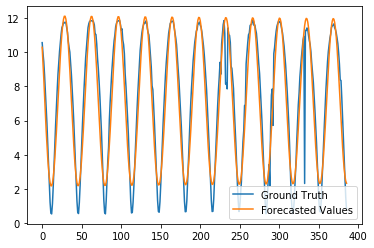

In [80]:
plt.plot(X_test)
plt.plot(yhat)
plt.legend(["Ground Truth","Forecasted Values"])

### single point prediction with uncertainity

In [81]:
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    forecast, stderr, conf = model_fit.forecast(alpha=a)
    print('%.1f%% Prediction Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, conf[0][0], conf[0][1]))

80.0% Prediction Interval: 10.287 between 9.190 and 11.384
90.0% Prediction Interval: 10.287 between 8.879 and 11.695
95.0% Prediction Interval: 10.287 between 8.609 and 11.965
99.0% Prediction Interval: 10.287 between 8.082 and 12.492


### prediction over test set

<Figure size 1440x1440 with 0 Axes>

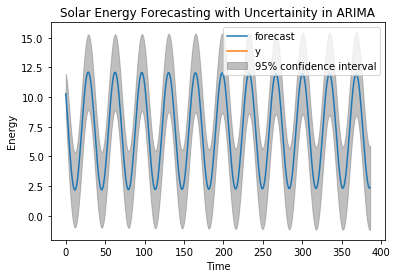

In [82]:
plt.figure(figsize=(20,20))
model_fit.plot_predict(len(X_train), len(X_train)+386)
plt.ylabel("Energy")
plt.xlabel("Time")
plt.title("Solar Energy Forecasting with Uncertainity in ARIMA")
plt.show()

### Using ARIMA

In [64]:
from statsmodels.tsa.arima_model import ARIMA
from random import random
# breaking the data into train and test
X_train = data[:600]
X_test = data[600:]
opt_a = 0
opt_b = 0
opt_c = 0
error = 99999
opt_y = []
for i in range(1,10):
    for j in range(1,10):
        for k in range(1,10):
            try:
                model = ARIMA(X_train, order=(i, j, k))
                model_fit = model.fit(disp=False)
                # make prediction
                yhat = model_fit.predict(len(X_train), len(data)-1, typ='levels')
                print("RMSE of the model :",math.sqrt(mse(X_test,yhat)))
                if error > math.sqrt(mse(X_test,yhat)) and len(yhat)==386:
                    opt_a = i
                    opt_b = j
                    opt_c = k
                    error = math.sqrt(mse(X_test,yhat))
            except:
                continue
print("Order of the Arima model :", opt_a,opt_b,opt_c)
print("RMSE of the model :", error)

RMSE of the model : 8.162552936558223
RMSE of the model : 7.858219021641949
RMSE of the model : 7.729447557942091
RMSE of the model : 7.817595902350314
RMSE of the model : 3.9666192619073257
RMSE of the model : 3.957449923212854
RMSE of the model : 109.79655444100686
RMSE of the model : 101.84091407290008
RMSE of the model : 117.95116032349672
RMSE of the model : 137.33203586203115
RMSE of the model : 4.216283789294876
RMSE of the model : 4.217604032464583
RMSE of the model : 4.225783934388762
RMSE of the model : 5.829405602535823
RMSE of the model : 8.027296129925107
RMSE of the model : 8.071603093402233
RMSE of the model : 7.545372076251884
RMSE of the model : 7.724445065400418
RMSE of the model : 3.26032410650517
RMSE of the model : 115.2673591234361
RMSE of the model : 106.37325824009068
RMSE of the model : 134.80252403195766
RMSE of the model : 133.1110898165155
RMSE of the model : 5.435543967052066
RMSE of the model : 5.624581678669068
RMSE of the model : 4.228004213134869
RMSE o

### fitting the model on optimal parameters

In [71]:
model = ARIMA(X_train, order=(2, 1, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(X_train), len(data)-1, typ='levels')
print("RMSE of the model :",math.sqrt(mse(X_test,yhat)))

RMSE of the model : 3.26032410650517


### prediction with uncertainity

<Figure size 1440x1440 with 0 Axes>

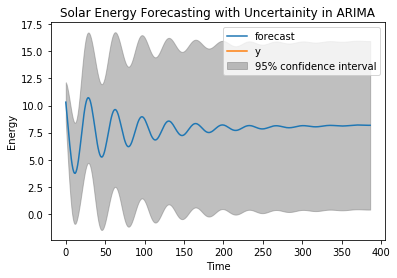

In [74]:
plt.figure(figsize=(20,20))
model_fit.plot_predict(len(X_train), len(X_train)+386)
plt.ylabel("Energy")
plt.xlabel("Time")
plt.title("Solar Energy Forecasting with Uncertainity in ARIMA")
plt.show()